# Fitness Project

In [1]:
from IPython.display import display, Markdown
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

display(Markdown("#  My Fitness Journey Project\n"
                 "This interactive notebook tracks and analyzes my fitness progress over time."))


#  My Fitness Journey Project
This interactive notebook tracks and analyzes my fitness progress over time.

In [2]:
import ipywidgets as widgets

# Input widgets for user profile and goals
weight_input = widgets.FloatText(description="Weight (kg):", value=75)
height_input = widgets.FloatText(description="Height (cm):", value=170)
goal_weight_input = widgets.FloatText(description="Goal Weight (kg):", value=68)
goal_date_input = widgets.DatePicker(description='Goal Date:', value=datetime.date.today() + datetime.timedelta(days=90))

def show_profile(weight, height, goal_weight, goal_date):
    height_m = height / 100
    bmi = weight / (height_m ** 2)
    display(Markdown(f"### Your Profile Summary:\n"
                     f"- Current Weight: **{weight} kg**\n"
                     f"- Height: **{height} cm**\n"
                     f"- BMI: **{bmi:.2f}**\n"
                     f"- Goal Weight: **{goal_weight} kg** by **{goal_date}**"))

display(Markdown("## Step 1: Enter Your Profile and Goals"))
display(weight_input)
display(height_input)
display(goal_weight_input)
display(goal_date_input)

widgets.interact(show_profile,
                 weight=weight_input,
                 height=height_input,
                 goal_weight=goal_weight_input,
                 goal_date=goal_date_input);


## Step 1: Enter Your Profile and Goals

FloatText(value=75.0, description='Weight (kg):')

FloatText(value=170.0, description='Height (cm):')

FloatText(value=68.0, description='Goal Weight (kg):')

DatePicker(value=datetime.date(2025, 8, 17), description='Goal Date:', step=1)

interactive(children=(FloatText(value=75.0, description='Weight (kg):'), FloatText(value=170.0, description='H…

In [3]:
import pandas as pd
import datetime
import ipywidgets as widgets
from IPython.display import display, Markdown

# Load or initialize the DataFrame
try:
    df = pd.read_csv("weight_log.csv", parse_dates=['Date'])
except FileNotFoundError:
    df = pd.DataFrame(columns=['Date', 'Weight (kg)', 'Chest (cm)', 'Waist (cm)', 'Hips (cm)'])

# Interactive widgets
date_picker = widgets.DatePicker(description='Date:', value=datetime.date.today())
weight_entry = widgets.FloatText(description='Weight (kg):')
chest_entry = widgets.FloatText(description='Chest (cm):')
waist_entry = widgets.FloatText(description='Waist (cm):')
hips_entry = widgets.FloatText(description='Hips (cm):')
button_add = widgets.Button(description="Add Entry", button_style='success')
output = widgets.Output()

# Function to add an entry
def add_entry(b):
    with output:
        global df
        entry = pd.DataFrame([{
            'Date': pd.to_datetime(date_picker.value),
            'Weight (kg)': weight_entry.value,
            'Chest (cm)': chest_entry.value,
            'Waist (cm)': waist_entry.value,
            'Hips (cm)': hips_entry.value
        }])
        df = pd.concat([df, entry], ignore_index=True)
        df = df.sort_values('Date')
        df.to_csv("weight_log.csv", index=False)
        output.clear_output()
        print(f" Entry for {entry.iloc[0]['Date'].date()} added!")
        display(df.tail(5))

button_add.on_click(add_entry)

# Display the UI
display(Markdown("## Step 2: Log Your Measurements Over Time"))
display(date_picker, weight_entry, chest_entry, waist_entry, hips_entry, button_add, output)


## Step 2: Log Your Measurements Over Time

DatePicker(value=datetime.date(2025, 5, 19), description='Date:', step=1)

FloatText(value=0.0, description='Weight (kg):')

FloatText(value=0.0, description='Chest (cm):')

FloatText(value=0.0, description='Waist (cm):')

FloatText(value=0.0, description='Hips (cm):')

Button(button_style='success', description='Add Entry', style=ButtonStyle())

Output()

## Step 3: Visualize Your Progress

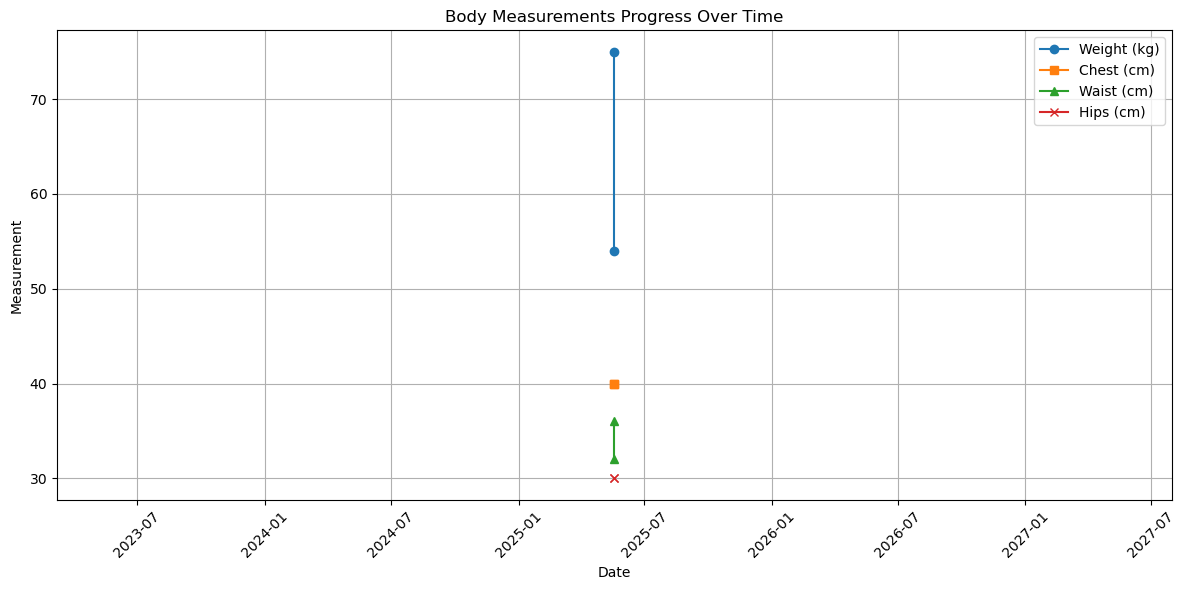

In [4]:
def plot_progress(dataframe):
    plt.figure(figsize=(12, 6))
    plt.plot(dataframe['Date'], dataframe['Weight (kg)'], marker='o', label='Weight (kg)')
    plt.plot(dataframe['Date'], dataframe['Chest (cm)'], marker='s', label='Chest (cm)')
    plt.plot(dataframe['Date'], dataframe['Waist (cm)'], marker='^', label='Waist (cm)')
    plt.plot(dataframe['Date'], dataframe['Hips (cm)'], marker='x', label='Hips (cm)')
    plt.title('Body Measurements Progress Over Time')
    plt.xlabel('Date')
    plt.ylabel('Measurement')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

display(Markdown("## Step 3: Visualize Your Progress"))
if not df.empty:
    plot_progress(df)
else:
    print("No data to plot yet. Please add measurement entries.")


In [5]:
workout_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
workout_routines = ['Chest + Triceps', 'Back + Biceps', 'Legs', 'Cardio + Core', 'Shoulders + Arms', 'Active Recovery', 'Rest']

checkboxes = [widgets.Checkbox(description=f"{day}: {routine}", value=False) for day, routine in zip(workout_days, workout_routines)]
log_button = widgets.Button(description="Log Completed Workouts")
workout_log_output = widgets.Output()

workout_log = []

def log_workouts(b):
    workout_log_output.clear_output()
    completed = [cb.description for cb in checkboxes if cb.value]
    today = datetime.date.today()
    if completed:
        for workout in completed:
            workout_log.append({'Date': today, 'Workout': workout})
        with workout_log_output:
            print(f"Logged {len(completed)} workouts for {today}:")
            for c in completed:
                print(f" - {c}")
    else:
        with workout_log_output:
            print("No workouts selected to log.")

log_button.on_click(log_workouts)

display(Markdown("## Step 4: Workout Tracker - Check Your Completed Workouts"))
display(widgets.VBox(checkboxes))
display(log_button)
display(workout_log_output)


## Step 4: Workout Tracker - Check Your Completed Workouts

Button(description='Log Completed Workouts', style=ButtonStyle())

Output()

## Step 5: Calories Burned vs Intake

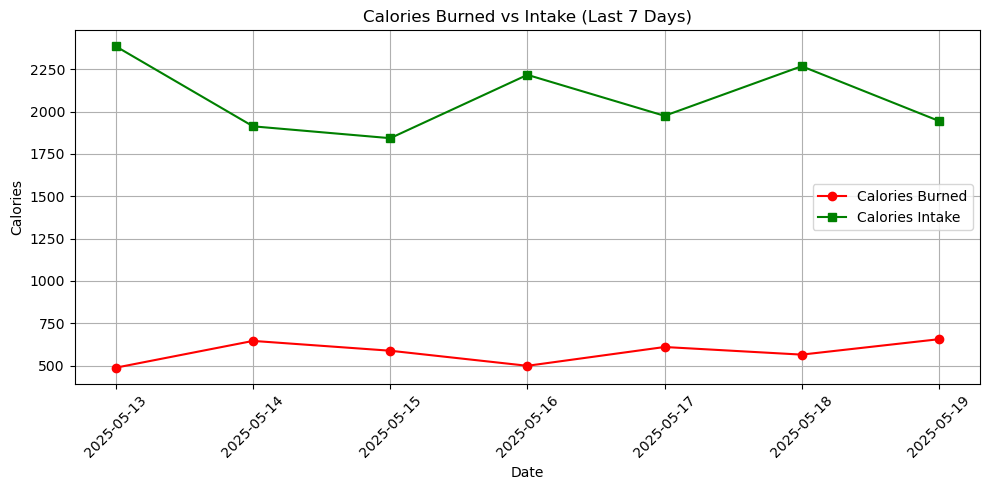

In [6]:
calorie_dates = pd.date_range(start=datetime.date.today() - datetime.timedelta(days=6), periods=7)
calories_burned = np.random.randint(400, 700, size=7)
calories_intake = np.random.randint(1800, 2500, size=7)

calorie_df = pd.DataFrame({
    'Date': calorie_dates,
    'Calories Burned': calories_burned,
    'Calories Intake': calories_intake
})

def plot_calories(df):
    plt.figure(figsize=(10, 5))
    plt.plot(df['Date'], df['Calories Burned'], label='Calories Burned', marker='o', color='red')
    plt.plot(df['Date'], df['Calories Intake'], label='Calories Intake', marker='s', color='green')
    plt.title("Calories Burned vs Intake (Last 7 Days)")
    plt.xlabel("Date")
    plt.ylabel("Calories")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

display(Markdown("## Step 5: Calories Burned vs Intake"))
plot_calories(calorie_df)


In [7]:
def summary_report(df, current_weight, goal_weight, goal_date):
    if df.empty:
        print("No progress data available.")
        return
    last_entry = df.iloc[-1]
    start_weight = df.iloc[0]['Weight (kg)']
    progress = start_weight - last_entry['Weight (kg)']
    remaining = last_entry['Weight (kg)'] - goal_weight
    days_left = (goal_date - last_entry['Date'].date()).days
    
    print("### Progress Summary")
    print(f"- Starting Weight: {start_weight:.1f} kg")
    print(f"- Current Weight: {last_entry['Weight (kg)']:.1f} kg")
    print(f"- Weight Lost So Far: {progress:.1f} kg")
    print(f"- Remaining Weight to Goal: {remaining:.1f} kg")
    print(f"- Days Left to Reach Goal: {days_left} days")
    
    if days_left <= 0:
        print("Goal date has passed. Time to update your goals or review your plan!")
    elif remaining <= 0:
        print("Congratulations! You have reached your goal weight.")
    else:
        avg_loss_needed = remaining / days_left
        print(f"- Average Weight Loss Needed Per Day: {avg_loss_needed:.3f} kg")

display(Markdown("## Step 6: Get a Summary Report"))
summary_report(df, weight_input.value, goal_weight_input.value, goal_date_input.value)


## Step 6: Get a Summary Report

### Progress Summary
- Starting Weight: 54.0 kg
- Current Weight: 75.0 kg
- Weight Lost So Far: -21.0 kg
- Remaining Weight to Goal: 7.0 kg
- Days Left to Reach Goal: 90 days
- Average Weight Loss Needed Per Day: 0.078 kg


In [8]:
from ipywidgets import interact, FloatSlider

def bmi_calc(weight, height):
    height_m = height / 100
    bmi = weight / (height_m**2)
    if bmi < 18.5:
        status = "Underweight"
    elif bmi < 25:
        status = "Normal weight"
    elif bmi < 30:
        status = "Overweight"
    else:
        status = "Obese"
    print(f"BMI: {bmi:.2f} ({status})")

display(Markdown("## Step 7: Calculate Your BMI"))
interact(bmi_calc, weight=FloatSlider(min=30, max=150, step=0.1, value=weight_input.value),
         height=FloatSlider(min=100, max=220, step=0.1, value=height_input.value))


## Step 7: Calculate Your BMI

interactive(children=(FloatSlider(value=75.0, description='weight', max=150.0, min=30.0), FloatSlider(value=17…

<function __main__.bmi_calc(weight, height)>

In [9]:
def export_workout_log(log, filename="workout_log.csv"):
    if not log:
        print("No workouts logged yet.")
        return
    df_log = pd.DataFrame(log)
    df_log.to_csv(filename, index=False)
    print(f"Workout log exported to '{filename}'.")

display(Markdown("## Step 8: Export Workout Log"))
export_workout_log(workout_log)


## Step 8: Export Workout Log

Workout log exported to 'workout_log.csv'.


In [10]:
import random

quotes = [
    "Push yourself because no one else is going to do it for you.",
    "Success doesn’t come from what you do occasionally, it comes from what you do consistently.",
    "The only bad workout is the one that didn’t happen.",
    "Discipline is choosing between what you want now and what you want most.",
    "Fall in love with taking care of yourself."
]

display(Markdown("## Final Motivation Quote"))
display(Markdown(f"> {random.choice(quotes)}"))


## Final Motivation Quote

> The only bad workout is the one that didn’t happen.

In [ ]:
import matplotlib.pyplot as plt

def load_data():
    print("Data loaded successfully!")

def save_data():
    print("Data saved successfully!")

def add_meal(date, meal_name, calories):
    print(f"Meal '{meal_name}' with {calories} calories added for {date}.")

def edit_meal(date, meal_name, new_calories):
    print(f"Meal '{meal_name}' updated to {new_calories} calories for {date}.")

def delete_meal(date, meal_name):
    print(f"Meal '{meal_name}' deleted for {date}.")

def view_meals(date):
    print(f"Displaying meals for {date}.")

def display_summary(date):
    meals = {"Breakfast": 300, "Lunch": 600, "Dinner": 500, "Snacks": 200}
    print(f"Summary for {date}:")
    for meal, calories in meals.items():
        print(f"{meal}: {calories} kcal")
    
    plt.bar(meals.keys(), meals.values(), color=['blue', 'green', 'red', 'orange'])
    plt.xlabel("Meal")
    plt.ylabel("Calories")
    plt.title(f"Calorie Intake on {date}")
    plt.show()

def weekly_trend(start_date, end_date):
    dates = ["Day 1", "Day 2", "Day 3", "Day 4", "Day 5", "Day 6", "Day 7"]
    calories = [1800, 2000, 1750, 1900, 2100, 1950, 1850]
    plt.plot(dates, calories, marker='o', linestyle='-', color='b')
    plt.xlabel("Date")
    plt.ylabel("Calories Consumed")
    plt.title(f"Weekly Calorie Trend ({start_date} to {end_date})")
    plt.show()

def calculate_calories(height, weight, age, gender, activity_level):
    if gender.lower() == "male":
        bmr = 10 * weight + 6.25 * height - 5 * age + 5
    else:
        bmr = 10 * weight + 6.25 * height - 5 * age - 161
    
    activity_multipliers = {
        "sedentary": 1.2,
        "light": 1.375,
        "moderate": 1.55,
        "active": 1.725,
        "very_active": 1.9
    }
    
    if activity_level in activity_multipliers:
        daily_calories = bmr * activity_multipliers[activity_level]
        print(f"Your daily calorie requirement is approximately {daily_calories:.2f} kcal.")
    else:
        print("Invalid activity level entered.")

def main():
    load_data()
    print("Welcome to the Advanced Calorie Tracker!")

    while True:
        print("\nChoose an option:")
        print("1. Add a Meal")
        print("2. Edit a Meal")
        print("3. Delete a Meal")
        print("4. View Meals for a Date")
        print("5. Display Summary for a Date")
        print("6. Generate Weekly Calorie Trend")
        print("7. Calculate Calories for Weight Maintenance/Deficit")
        print("8. Save and Exit")
        
        choice = input("Enter your choice (1-8): ")

        if choice == "1":
            date = input("Enter the date (YYYY-MM-DD): ")
            meal_name = input("Enter the meal name: ")
            try:
                calories = int(input("Enter the calories: "))
                add_meal(date, meal_name, calories)
            except ValueError:
                print("Invalid calorie input. Please enter a valid number.")
        elif choice == "2":
            date = input("Enter the date (YYYY-MM-DD): ")
            meal_name = input("Enter the meal name to edit: ")
            try:
                new_calories = int(input("Enter the new calorie value: "))
                edit_meal(date, meal_name, new_calories)
            except ValueError:
                print("Invalid calorie input. Please enter a valid number.")
        elif choice == "3":
            date = input("Enter the date (YYYY-MM-DD): ")
            meal_name = input("Enter the meal name to delete: ")
            delete_meal(date, meal_name)
        elif choice == "4":
            date = input("Enter the date (YYYY-MM-DD): ")
            view_meals(date)
        elif choice == "5":
            date = input("Enter the date (YYYY-MM-DD): ")
            display_summary(date)
        elif choice == "6":
            start_date = input("Enter the start date (YYYY-MM-DD): ")
            end_date = input("Enter the end date (YYYY-MM-DD): ")
            weekly_trend(start_date, end_date)
        elif choice == "7":
            height = float(input("Enter your height in cm: "))
            weight = float(input("Enter your weight in kg: "))
            age = int(input("Enter your age: "))
            gender = input("Enter your gender (male/female): ")
            activity_level = input("Enter your activity level (sedentary, light, moderate, active, very_active): ")
            calculate_calories(height, weight, age, gender, activity_level)
        elif choice == "8":
            save_data()
            print("Exiting...")
            break
        else:
            print("Invalid choice. Please choose a valid option (1-8).")

if __name__ == "__main__":
    main()


Data loaded successfully!
Welcome to the Advanced Calorie Tracker!

Choose an option:
1. Add a Meal
2. Edit a Meal
3. Delete a Meal
4. View Meals for a Date
5. Display Summary for a Date
6. Generate Weekly Calorie Trend
7. Calculate Calories for Weight Maintenance/Deficit
8. Save and Exit


In [11]:
display(Markdown("""
---
## Contact Me

Email: [swapnilchavan211101@gmail.com](mailto:nill@example.com)  
LinkedIn: [https://www.linkedin.com/in/swapnil-chavan-30033015a/](https://linkedin.com/in/nill)  
GitHub: [https://github.com/swapniiiil21](https://github.com/nill)  

Feel free to connect and discuss fitness or projects!

---
"""))



---
## Contact Me

Email: [swapnilchavan211101@gmail.com](mailto:nill@example.com)  
LinkedIn: [https://www.linkedin.com/in/swapnil-chavan-30033015a/](https://linkedin.com/in/nill)  
GitHub: [https://github.com/swapniiiil21](https://github.com/nill)  

Feel free to connect and discuss fitness or projects!

---
